In [532]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt

In [533]:
# aurin
with open("homeless.json") as f:
    homeless = json.load(f)
    
with open("child.json") as f:
    child = json.load(f)
    
with open("unemployment.json") as f:
    unemployment = json.load(f)
    
with open("satisfaction.json") as f:
    satisfaction = json.load(f)
    
with open("education.json") as f:
    education = json.load(f)
    
with open("hour.json") as f: 
    hour = json.load(f)
    
with open("people.json") as f:
    people = json.load(f)
    
with open("median_income.json") as f:
    income = json.load(f)
    
with open("overtime_age.json") as f:
    overtime_age = json.load(f)
    
# # twitter
# with open("../total_analy.json", "r") as f:
#     twitter_data = json.load(f)
    
with open("../textblob.json", "r") as f:
    twitter_data = json.load(f)["rows"][3]["doc"]

In [534]:
twitter_data.keys()

dict_keys(['_id', '_rev', 'tweets_num', 'total_info', 'negative_tweets_num', 'negative_word_freq', 'negative_info'])

In [535]:
# # read twitter_data
# code_ls = twitter_data["total_info"].keys()
# records = []

# for code in code_ls:
#     record = {"sa2_main16": code,
#               "total_tweet": twitter_data["total_info"].get(code, 0),
#               "anger_tweet": twitter_data["anger_info"].get(code, 0),
#               "amusement_tweet": twitter_data["amusement_info"].get(code, 0),
#               "annoyance_tweet": twitter_data["annoyance_info"].get(code, 0),
#               "fear_tweet": twitter_data["negative_fear_info"].get(code, 0),
#               "indifference_tweet": twitter_data["indifference_info"].get(code, 0),
#               "joy_tweet": twitter_data["joy_info"].get(code, 0),
#               "awe_tweet": twitter_data["awe_info"].get(code, 0),
#               "sad_tweet": twitter_data["sadness_info"].get(code, 0)}
#     records.append(record)

# df1 = pd.DataFrame.from_records(records)

In [536]:
# # read twitter_data with react
# code_ls = twitter_data["total_info"].keys()
# records = []

# for code in code_ls:
#     record = {"sa2_main16": code,
#               "total_tweet": twitter_data["total_info"].get(code, 0),
#               "love_tweet": twitter_data["love_info"].get(code, 0),
#               "haha_tweet": twitter_data["haha_info"].get(code, 0),
#               "angry_tweet": twitter_data["angry_info"].get(code, 0),
#               "wow_tweet": twitter_data["wow_info"].get(code, 0),
#               "sad_tweet": twitter_data["sad_info"].get(code, 0)}
#     records.append(record)

# df1 = pd.DataFrame.from_records(records)

In [537]:
# read twitter_data with react
code_ls = twitter_data["total_info"].keys()
records = []

for code in code_ls:
    record = {"sa2_main16": code,
              "total_tweet": twitter_data["total_info"].get(code, 0),
              "negative_tweet": twitter_data["negative_info"].get(code, 0)}
    records.append(record)

df1 = pd.DataFrame.from_records(records)

In [538]:
# read aurin data
df2 = pd.DataFrame.from_records(list(map(lambda x: x["properties"], hour["features"])))
df3 = pd.DataFrame.from_records(list(map(lambda x: x["properties"], homeless["features"])))
df4 = pd.DataFrame.from_records(list(map(lambda x: x["properties"], unemployment["features"])))
df5 = pd.DataFrame.from_records(list(map(lambda x: x["properties"], income1["features"])))
df52 = pd.DataFrame.from_records(list(map(lambda x: x["properties"], income2["features"])))
df6 = pd.DataFrame.from_records(list(map(lambda x: x["properties"], satisfaction["features"])))
df7 = pd.DataFrame.from_records(list(map(lambda x: x["properties"], education["features"])))
df8 = pd.DataFrame.from_records(list(map(lambda x: x["properties"], people["features"])))
df9 = pd.DataFrame.from_records(list(map(lambda x: x["properties"], income["features"])))
df10 = pd.DataFrame.from_records(list(map(lambda x: x["properties"], overtime_age["features"])))

In [539]:
df1.head()

,negative_tweet,sa2_main16,total_tweet
0,23,208021177,544
1,3232,206041122,48587
2,102,209021428,1217
3,161,206071141,1952
4,25,210031438,146


In [540]:
# df1["wrath_rate(%)"] = (df1["anger_tweet"] + df1["annoyance_tweet"])/ df1["total_tweet"]*100
# filtered_df1 = df1.loc[:, ["sa2_main16", "wrath_rate(%)"]]

In [541]:
df1["wrath_rate(%)"] = df1["negative_tweet"] / df1["total_tweet"]*100
filtered_df1 = df1.loc[:, ["sa2_main16", "wrath_rate(%)"]]

In [542]:
filtered_df1.head()

,sa2_main16,wrath_rate(%)
0,208021177,4.227941
1,206041122,6.651985
2,209021428,8.381265
3,206071141,8.247951
4,210031438,17.123288


In [543]:
df2["work_overtime(%)"] = (df2["p_tot_41_48"] + df2["p_tot_49over"]) / (df2["p_tot_tot"] - df2["p_tot_hours_ns"] - df2["p_tot_0"])*100
filtered_df2 = df2.loc[:,["sa2_main16", "work_overtime(%)"]]
filtered_df2.head()

,sa2_main16,work_overtime(%)
0,213051466,21.008403
1,206061136,34.802665
2,206071141,32.650790
3,210031440,20.995025
4,210041240,23.914851


In [544]:
df3.head()  # no need to handle

,hl_p_homeless_tot,sa2_main16
0,223,206071142
1,100,212031302
2,73,206061136
3,95,206071141
4,49,210031440


In [545]:
df4["unemp_rate(%)"] = df4["p_tot_unemp_total"]/df4["p_tot_tot"]*100
filtered_df4 = df4.loc[:,["sa2_main16", "unemp_rate(%)"]]
filtered_df4.head()

,sa2_main16,unemp_rate(%)
0,206061136,3.246608
1,206071141,4.735932
2,210031440,4.063797
3,210041240,4.152841
4,210041241,4.004550


In [546]:
# Weekly income
df5 = df5.merge(df52)

In [547]:
df5.head()

,sa2_main16,tot_1000_1249_tot,tot_1250_1499_tot,tot_1500_1749_tot,tot_150_299_tot,tot_1_149_tot,tot_300_399_tot,tot_400_499_tot,tot_500_649_tot,tot_650_799_tot,tot_800_999_tot,tot_1750_1999_tot,tot_2000_2999_tot,tot_3000mo_tot,tot_pins_tot,tot_tot_tot
0,206061136,1388,1018,853,447,271,562,577,844,1047,1330,512,638,521,133,10219
1,206071141,1670,1339,1087,373,174,395,499,730,1078,1477,719,1088,742,173,11592
2,210031440,172,131,93,58,40,47,57,81,92,105,79,64,8,25,1055
3,210041241,685,410,314,469,569,440,488,705,720,757,198,211,115,111,6243
4,210041240,237,150,129,85,64,75,108,152,158,196,83,84,26,28,1587


In [548]:
df6["sa2_main16"] = df6["sa2_code16"]
df6["high_satisfaction_rate(%)"] = df6["life_satisfaction_pc_80_to_100_synth"]*100
filtered_df6 = df6.loc[:,["sa2_main16", "high_satisfaction_rate(%)"]]
filtered_df6.head()

,sa2_main16,high_satisfaction_rate(%)
0,206061136,64.7118
1,206071141,61.3216
2,210031440,62.3543
3,210041240,66.8407
4,210041241,65.1980


In [549]:
df7["complete_y12_rate(%)"] = df7["p_y12e_tot"]/(df7["m_tot_tot"] + df7["f_tot_tot"])*100
filtered_df7 = df7.loc[:,["sa2_main16", "complete_y12_rate(%)"]]
filtered_df7.head()

,sa2_main16,complete_y12_rate(%)
0,206061136,74.319796
1,206071141,70.348837
2,210031440,47.283474
3,210041241,49.113220
4,210041240,49.388493


In [550]:
df8_renamed = df8.rename(columns={"births_dth_births_p_num": "birth_num", 
                                  "births_dth_dth_p_num": "death_num", 
                                  "births_dth_stnd_death_rt_per_1000_pop_p_rate": "death_rate(%)", 
                                  "births_dth_tot_fert_rt_per_f_p_rate": "fertility_rate(%)",
                                  "est_res_pop_med_age_usual_res_erp_30_jun_p_yrs": "median_age",
                                  "est_res_pop_p_tot_num": "population",
                                  "est_res_pop_p_wrking_age_pop_15_64_yrs_pr100": "working_age_rate(%)",
                                  "sa2_code16": "sa2_main16"})

filtered_df8 = df8_renamed.loc[:,["sa2_main16", "death_rate(%)", "population", "median_age"]]
filtered_df8.head()

,sa2_main16,death_rate(%),population,median_age
0,206061136,5.7,21275.0,33.2
1,210031440,3.9,5911.0,38.2
2,210041240,5.3,13238.0,38.1
3,208021180,4.9,8038.0,35.0
4,213051466,NaN,15147.0,31.5


In [551]:
df9 = df9.rename(columns={"sa2_code_2016":"sa2_main16"})
df9.head()

,median_aud_2014_15,sa2_main16
0,NaN,208031192
1,112.0,209011197
2,166.0,206061136
3,108.0,206071141
4,173.0,210031440


In [552]:
df10.head()

,p_tot_0,p_tot_16_24,p_tot_1_15,p_tot_25_34,p_tot_35_39,p_tot_40,p_tot_41_48,p_tot_49over,p_tot_hours_ns,p_tot_tot,sa2_main16
0,211,507,548,615,1611,1885,594,781,124,6880,213051466
1,317,958,887,962,2095,2730,1575,2499,134,12157,206061136
2,151,370,354,451,785,1064,594,873,67,4711,206071141
3,62,230,216,230,496,404,210,212,64,2136,210031440
4,196,691,768,748,1156,1214,568,870,85,6294,210041240


In [553]:
print(len(df1))
print(len(df3))
print(len(filtered_df4))
print(len(filtered_df6))
print(len(filtered_df7))
print(len(filtered_df8))
print(len(df9))

303
309
309
309
309
309
309


In [554]:
combined_df = filtered_df1.merge(filtered_df2).merge(df3).merge(filtered_df4).merge(filtered_df6).merge(filtered_df7).merge(filtered_df8).merge(df9)

In [555]:
combined_df.head()

,sa2_main16,wrath_rate(%),work_overtime(%),hl_p_homeless_tot,unemp_rate(%),high_satisfaction_rate(%),complete_y12_rate(%),death_rate(%),population,median_age,median_aud_2014_15
0,208021177,4.227941,28.198272,51,3.500507,66.8942,78.709476,4.2,22288.0,34.4,219.0
1,206041122,6.651985,18.947785,928,6.225177,NaN,69.105325,2.4,40181.0,26.2,130.0
2,209021428,8.381265,21.054965,143,4.835647,59.5230,63.116359,5.6,21192.0,35.5,95.0
3,206071141,8.247951,32.650790,95,4.735932,61.3216,70.348837,6.8,9235.0,32.1,108.0
4,210031438,17.123288,18.986906,116,4.993372,59.5235,56.197167,7.2,23153.0,33.9,131.0


In [556]:
combined_df.corr()

,wrath_rate(%),work_overtime(%),hl_p_homeless_tot,unemp_rate(%),high_satisfaction_rate(%),complete_y12_rate(%),death_rate(%),population,median_age,median_aud_2014_15
wrath_rate(%),1.000000,0.005857,-0.082961,-0.087900,-0.015032,-0.026641,-0.054050,-0.102697,0.066460,-0.108806
work_overtime(%),0.005857,1.000000,-0.232962,-0.664834,0.654362,0.364884,-0.291200,-0.129715,0.271997,0.572791
hl_p_homeless_tot,-0.082961,-0.232962,1.000000,0.485935,-0.412340,0.033400,0.172101,0.500758,-0.368765,-0.123940
unemp_rate(%),-0.087900,-0.664834,0.485935,1.000000,-0.775926,0.018806,0.345498,0.295907,-0.540607,-0.437905
high_satisfaction_rate(%),-0.015032,0.654362,-0.412340,-0.775926,1.000000,-0.046455,-0.211555,-0.157897,0.527618,0.382747
complete_y12_rate(%),-0.026641,0.364884,0.033400,0.018806,-0.046455,1.000000,-0.356410,0.149349,-0.017940,0.424510
death_rate(%),-0.054050,-0.291200,0.172101,0.345498,-0.211555,-0.356410,1.000000,-0.010869,-0.232848,-0.290597
population,-0.102697,-0.129715,0.500758,0.295907,-0.157897,0.149349,-0.010869,1.000000,-0.137519,0.001836
median_age,0.066460,0.271997,-0.368765,-0.540607,0.527618,-0.017940,-0.232848,-0.137519,1.000000,0.427666
median_aud_2014_15,-0.108806,0.572791,-0.123940,-0.437905,0.382747,0.424510,-0.290597,0.001836,0.427666,1.000000


In [557]:
combined_df.corr().iloc[0, 1:]

work_overtime(%)             0.005857
hl_p_homeless_tot           -0.082961
unemp_rate(%)               -0.087900
high_satisfaction_rate(%)   -0.015032
complete_y12_rate(%)        -0.026641
death_rate(%)               -0.054050
population                  -0.102697
median_age                   0.066460
median_aud_2014_15          -0.108806
Name: wrath_rate(%), dtype: float64

In [558]:
combined_df["hl_p_homeless_tot"].corr(combined_df["complete_y12_rate(%)"], method="pearson")

0.03339963133787969

Text(0, 0.5, 'wrath_rate')

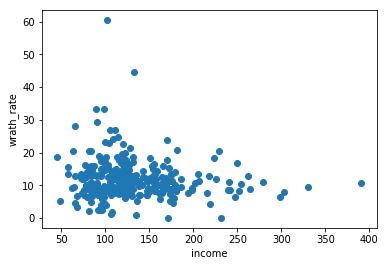

In [563]:
plt.scatter(combined_df["median_aud_2014_15"],
            combined_df["wrath_rate(%)"])
plt.xlabel('income')
plt.ylabel('wrath_rate')

In [560]:
df1 = pd.DataFrame.from_dict(data["polygon_info"], orient="index", columns = ["wrath tweet"])

NameError: name 'data' is not defined

In [ ]:
df1.head()

In [ ]:
data2.keys()

In [ ]:
code_ls = data2["total_info"].keys()
records = []

for code in code_ls:
    record = {"sa2_main16": code,
              "total_tweet": data2["total_info"].get(code, 0),
              "anger_tweet": data2["anger_info"].get(code, 0),
              "amusement_tweet": data2["amusement_info"].get(code, 0),
              "fear_tweet": data2["negative_fear_info"].get(code, 0),
              "indifference_tweet": data2["indifference_info"].get(code, 0),
              "joy_tweet": data2["joy_info"].get(code, 0),
              "awe_tweet": data2["awe_info"].get(code, 0),
              "sad_tweet": data2["sadness_info"].get(code, 0)}
    records.append(record)

df9 = pd.DataFrame.from_records(records)

In [ ]:
df9

In [ ]:
df2["angry_rate(%)"] = df2["angry_tweet"]/df2["total_tweet"]*100

In [ ]:
df2.head()

In [ ]:
# combined_df = filtered_df1.merge(df3).merge(filtered_df4).merge(filtered_df7)

# OUTPUT FOR PIE-CHART

In [ ]:
pie_dict = {}
region_dict = {"Melbourne": "206041122",
               "Docklands": "206041118",
               "Southbank": "206041126",
               "East Melbourne": "206041119",
               "Kensington": "206041121"}

for region, code in region_dict.items():
    pie_dict[region] = {"total_tweet": data2["total_info"][code],
                      "anger_tweet": data2["anger_info"][code],
                      "amusement_tweet": data2["amusement_info"][code],
                      "fear_tweet": data2["negative_fear_info"][code],
                      "indifference_tweet": data2["indifference_info"][code],
                      "joy_tweet": data2["joy_info"][code],
                      "awe_tweet": data2["awe_info"][code],
                      "sad_tweet": data2["sadness_info"][code]}

In [ ]:
with open("pie_chart.json", "w") as f:
    json.dump(pie_dict, f)

In [ ]:
pie_dict

In [ ]:
records = []
for region, info_dict in pie_dict.items():
    info_dict["sa2_main16"] = region_dict[]
    record.append(info_dict["sa2_main16"] = )

In [ ]:
gender["features"][0]["properties"]  # record sample

# PCA and Linear Regression

In [264]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [203]:
pca = PCA(n_components=3)

In [259]:
df = combined_df.dropna()
X = df.loc[:,"work_overtime(%)": "median_age"].values
pca.fit(X)
X = pca.transform(X)
y = df["wrath_rate(%)"].values

In [260]:
print(len(X))
print(len(y))

265
265


In [261]:
model = LinearRegression()

In [262]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [268]:
model.score(X, y)

0.03227730873195844

In [271]:
# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(model.predict(X), y))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(model.predict(X), y))

Coefficients: 
 [-6.64647164e-05 -3.08465021e-04  8.78006992e-02]
Mean squared error: 31.85
Variance score: -28.98


In [ ]:
# # Plot outputs
# plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
# plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

# plt.xticks(())
# plt.yticks(())

# plt.show()